## Interfaces en Java

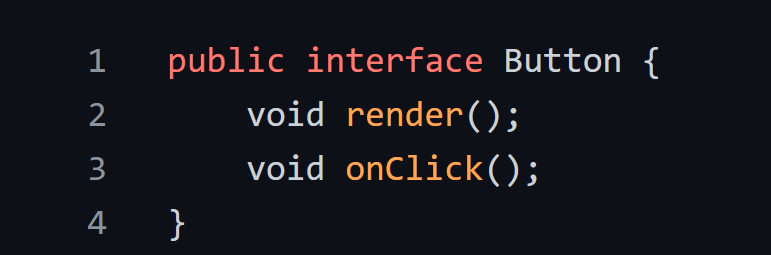

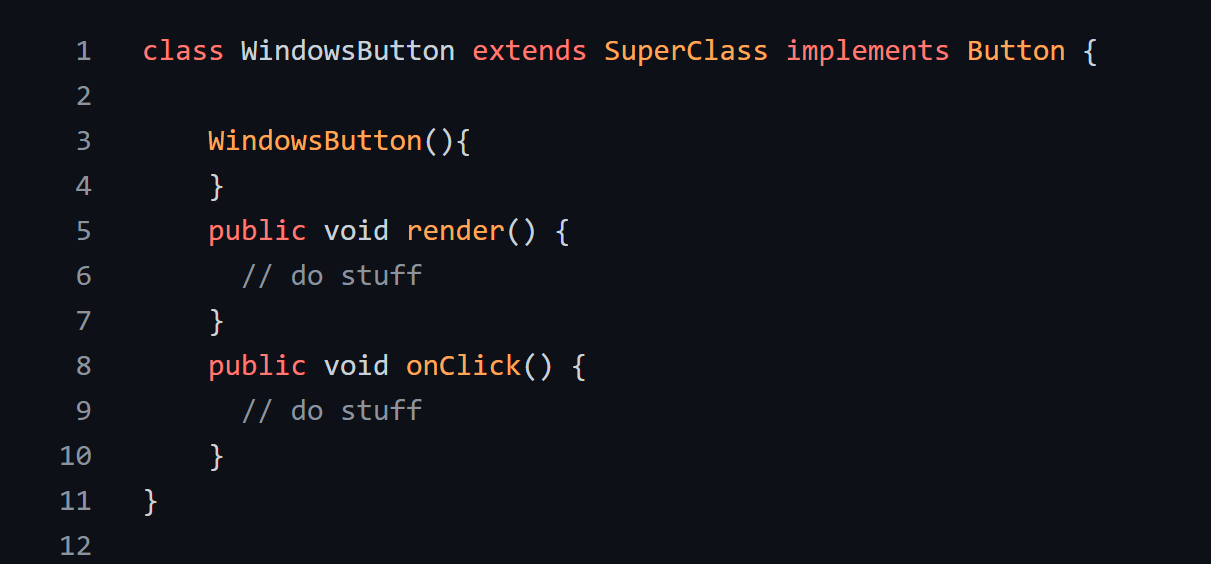




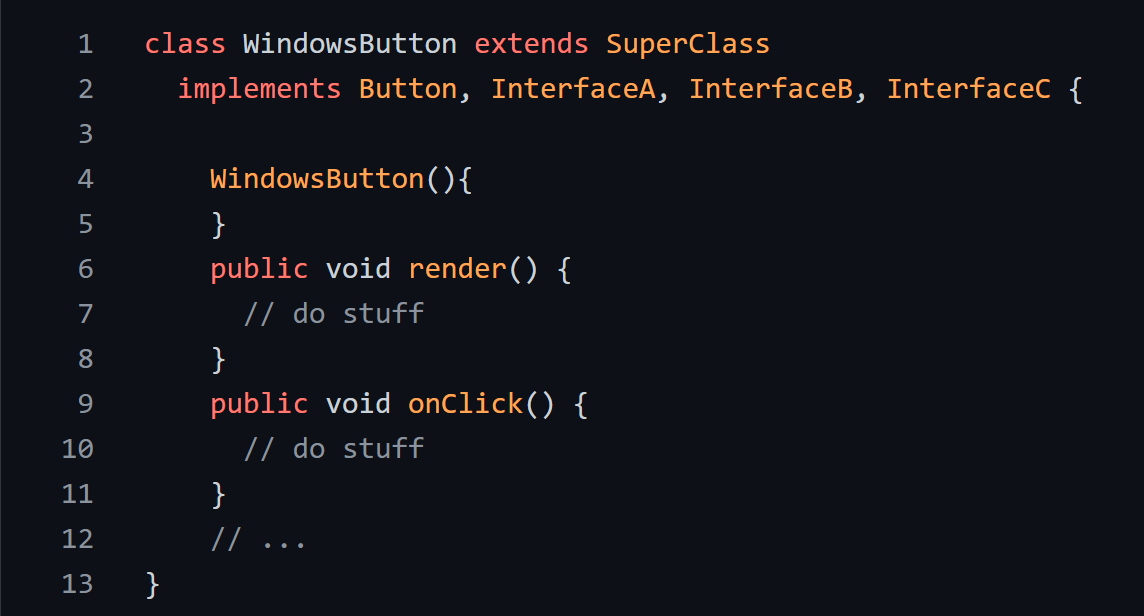

## Interfaces en python

¿Que pasa si lo definimos como una clase?

No es lo ideal, ya que no obligamos a las subclasses que implementen los metodos

In [1]:

class IButton(): 

  def render(self) -> None:
    pass
  

  def on_click(self) -> None:
    pass

In [2]:
class WindowsButton(IButton):
  pass

In [3]:
windows_button = WindowsButton()

Definimos como clase abstracta e indicamos cuales metodos seran abstractos

In [4]:
from abc import ABC, abstractmethod


class IButton(ABC):
    @abstractmethod
    def render(self) -> None:
        pass

    @abstractmethod
    def on_click(self) -> None:
        pass

In [5]:
class WindowsButton(IButton):
  pass

In [6]:
try:
  windows_button = WindowsButton()
except TypeError as error:
  print(F"Error: {error}")

Error: Can't instantiate abstract class WindowsButton with abstract methods on_click, render


El error que nos indica esta bien, queremos obligar que las subclasses realicen sus implementaciones de los metodos que definimos como abstractos.

In [7]:
class WindowsButton(IButton):
  def render(self) -> None:
    print("render")
  
  def on_click(self) -> None:
    print("on_click")

In [8]:
windows_button = WindowsButton()

### ¿Necesitamos interfaces?

Definamos una clase cliente llamada "App".

Nuesta clase "App", en su metodo "main()" espera recibir como parametro un objeto que implemente la interfaz definida anteriormente llamada "IButton".

In [9]:
class Application:
  def main(self, button: IButton) -> None:
    button.render()
    button.on_click()

Hasta ahorita el código funciona como antes, creamos una instancia de "WindowsButton" que implementa la interfaz "IButton".


Posteriormente creamos una instancia de App y mandamos a llamar al metodo "main()" que espera recibir un objeto

In [10]:
windows_button = WindowsButton()
app = Application()
app.main(windows_button)

render
on_click


In [11]:
class CheckBox:
  def render(self) -> None:
    print("render checkbox")

  def on_click(self) -> None:
    print("on_click checkbox")

In [12]:
checkbox = CheckBox()
app = Application()

# El metodo main esperaba recibir una instancia de un objeto que implemente la
#  la interfaz Button. 
#  Sin embargo, nuestra clase Checkbox no lo hace.
#
#  :(  - En lenguajes como Java esto es un error de compilación. 
#  :D  - Para Python no importa ya que no es un lenguaje de tipado fuerte.
#
#        Unicamente debemos asegurarnos que la instancia del objeto que enviemos 
#        Esten definidos los metodos que requiera el metodo main.
app.main(checkbox)

render checkbox
on_click checkbox
